In [26]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../")


gammaH=267.513*10**6;
gammaN=-27.166*10**6;

mu = 4 * np.pi * 10**(-7) #magnetic constant of vacuum permeability
h_planck = 1.055 * 10**(-34); #reduced Planck constant
rN = 0.101 * 10**(-9); # average cubic length of N-H bond
d = 1 * (mu * gammaN * gammaH * h_planck) / (4 * np.pi * rN**3); # dipolar coupling constant


In [77]:
protein_p13={}
protein_p13[9.4]=[]
protein_p13[11.75]=[]
protein_p13[14.1]=[]

with open('protein_p13_T2_9.4T.dat') as f:
    for line in f:
        protein_p13[14.1].append([np.round(float(line.split(',')[0])),float(line.split(',')[1])])
        
with open('protein_p13_T2_11.75T.dat') as f:
    for line in f:
        protein_p13[11.75].append([np.round(float(line.split(',')[0])),float(line.split(',')[1])])
        
with open('protein_p13_T2_14.1T.dat') as f:
    for line in f:
        protein_p13[9.4].append([np.round(float(line.split(',')[0])),float(line.split(',')[1])])

In [78]:
effective_times={}
for B,data in protein_p13.items():
    wn = gammaN * B
    K1=(d**2 / 20)
    K2=(wn * 160 * 10**(-6))**2 / 45
    A=1/(4*K1+4*K2)
    print(A)
    effective_times[B]=[]
    for residue in data:                            
        effective_times[B].append([residue[0],(residue[1])*A*10**9])

7.962436144805607e-10
7.466227580467577e-10
6.937794609005708e-10


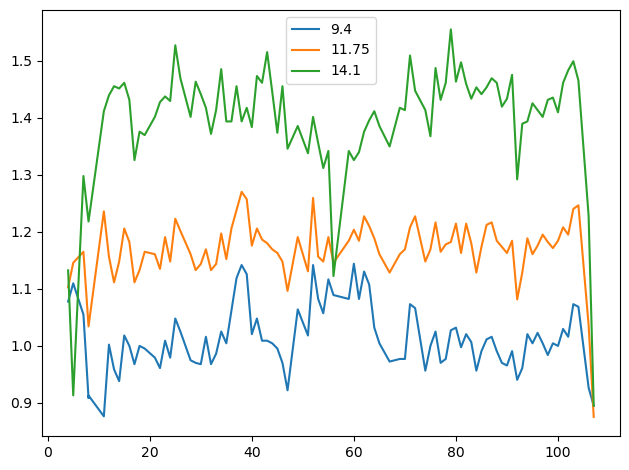

In [79]:
plt.plot(np.array(effective_times[9.4])[:,0],np.array(effective_times[9.4])[:,1],label="9.4")
plt.plot(np.array(effective_times[11.75])[:,0],np.array(effective_times[11.75])[:,1],label="11.75")
plt.plot(np.array(effective_times[14.1])[:,0],np.array(effective_times[14.1])[:,1],label="14.1")
plt.legend()

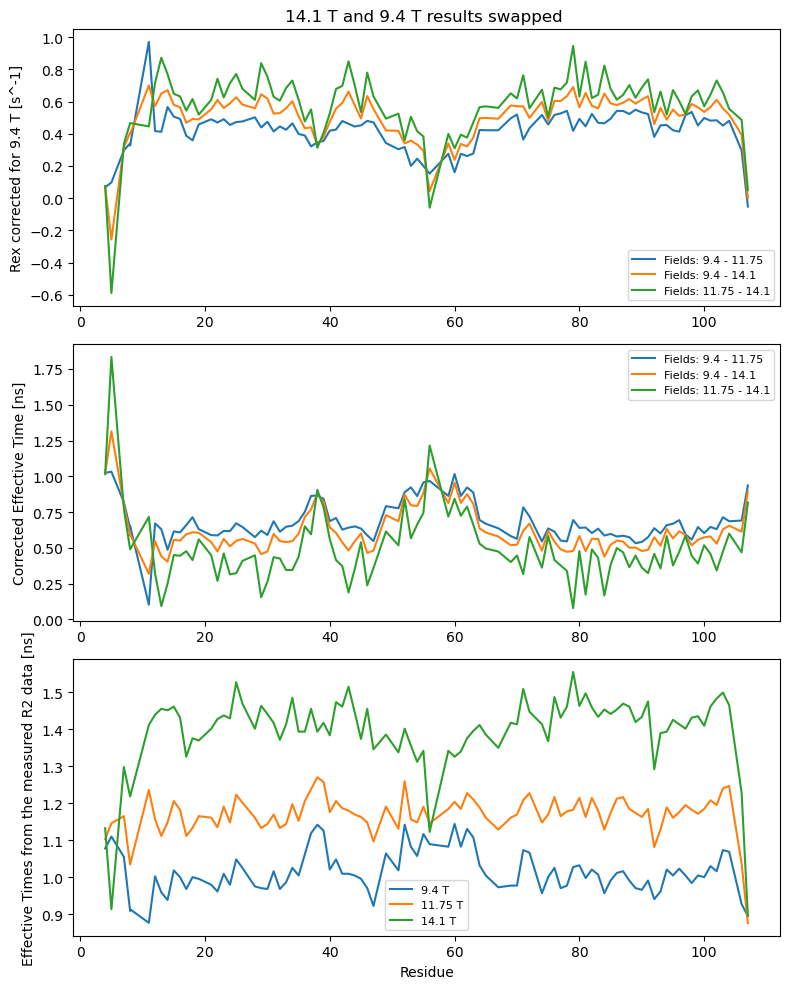

In [80]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,1,figsize=(8,10))
for B1,data1 in protein_p13.items():
    for B2,data2 in protein_p13.items():
        if B2>B1:
        
                
            wn1 = gammaN * B1 
            wn2 = gammaN * B2 

    
            K1=(d**2 / 20)
            K2_1=(wn1 * 160 * 10**(-6))**2 / 45
            K2_2=(wn2 * 160 * 10**(-6))**2 / 45

            A1=1/(4*K1+4*K2_1)
            A2=1/(4*K1+4*K2_2)
                            
            Rex=[]
            Rex2=[]
            residues=[]
            eff=[]
            for residue in data1:
                if residue[0] in np.array(data2)[:,0]:
                    
                    pos_big=list(np.array(data2)[:,0]).index(residue[0])
                    R2_1=residue[1]
                    R2_2=np.array(data2)[:,1][pos_big]
                    Rex.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2)/((float(B1)/9.4)**2))
                    Rex2.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2))
                    residues.append(int(residue[0]))
                    eff.append((R2_1-Rex2[-1])*A1*10**9)
            axs[1].plot(residues,eff,"-",label=f'Fields: {B1} - {B2}')
            axs[0].plot(residues,Rex,"-",label=f'Fields: {B1} - {B2}')
                    
residues=[]
eff=[]
for B,data in effective_times.items():
    axs[2].plot(np.array(data)[:,0],np.array(data)[:,1],label=str(B)+" T")                
 

axs[0].legend(prop={'size':8})
axs[1].legend(prop={'size':8})
axs[2].legend(prop={'size':8})

axs[0].set_ylabel('Rex corrected for 9.4 T [s^-1]')
axs[1].set_ylabel('Corrected Effective Time [ns]')
axs[2].set_ylabel('Effective Times from the measured R2 data [ns]')
axs[2].set_xlabel("Residue")

axs[0].set_title('14.1 T and 9.4 T results swapped ')
plt.savefig('reverse_data.png')

In [95]:
MIZI={}
MIZI[700]=[]
MIZI[950]=[]

with open('MIZ1-BTB_700MHz.dat') as f:
    for line in f:
        MIZI[700].append([np.round(float(line.split()[0])),float(line.split()[1])])
        
with open('MIZ1-BTB_950MHz.dat') as f:
    for line in f:
        MIZI[950].append([np.round(float(line.split()[0])),float(line.split()[1])])
        


In [96]:
effective_times={}
for mag,data in MIZI.items():
    B=mag*2*np.pi/gammaH*10**6
    wn = gammaN * B
    K1=(d**2 / 20)
    K2=(wn * 160 * 10**(-6))**2 / 45
    A=1/(4*K1+4*K2)
    effective_times[B]=[]
    for residue in data:                            
        effective_times[B].append([residue[0],(residue[1])*A*10**9])

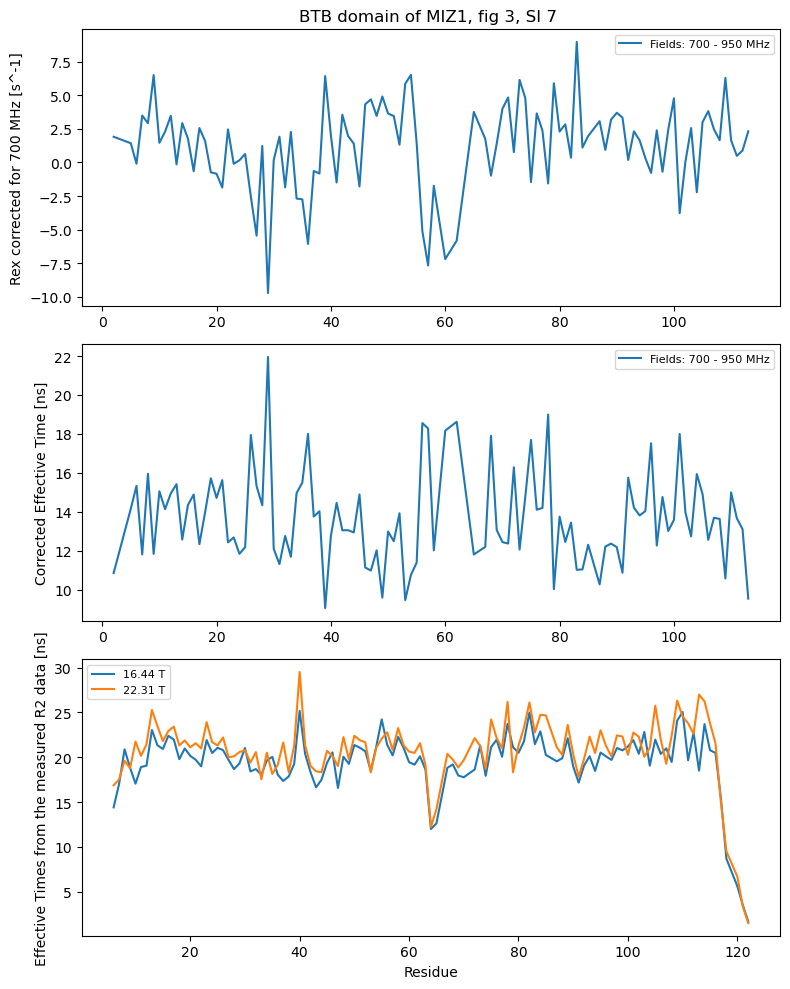

In [113]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,1,figsize=(8,10))
for mag1,data1 in MIZI.items():
    for mag2,data2 in MIZI.items():
        if mag2>mag1:
        
            B1=mag1*2*np.pi/gammaH*10**6
            B2=mag2*2*np.pi/gammaH*10**6
            wn1 = gammaN * B1 
            wn2 = gammaN * B2 

    
            K1=(d**2 / 20)
            K2_1=(wn1 * 160 * 10**(-6))**2 / 45
            K2_2=(wn2 * 160 * 10**(-6))**2 / 45

            A1=1/(4*K1+4*K2_1)
            A2=1/(4*K1+4*K2_2)
                            
            Rex=[]
            Rex2=[]
            residues=[]
            eff=[]
            for residue in data1:
                if residue[0] in np.array(data2)[:,0]:
                    
                    pos_big=list(np.array(data2)[:,0]).index(residue[0])
                    R2_1=residue[1]
                    R2_2=np.array(data2)[:,1][pos_big]
                    Rex.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2)/((float(mag1)/mag1)**2))
                    Rex2.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2))
                    residues.append(int(residue[0]))
                    eff.append((R2_1-Rex2[-1])*A1*10**9)
            axs[1].plot(residues,eff,"-",label=f'Fields: {mag1} - {mag2} MHz')
            axs[0].plot(residues,Rex,"-",label=f'Fields: {mag1} - {mag2} MHz')
                    
residues=[]
eff=[]
for B,data in effective_times.items():
    labell=f'{B:.2f} T'
    axs[2].plot(np.array(data)[:,0],np.array(data)[:,1],label=labell)                
 

axs[0].legend(prop={'size':8})
axs[1].legend(prop={'size':8})
axs[2].legend(prop={'size':8})

axs[0].set_ylabel('Rex corrected for 700 MHz [s^-1]')
axs[1].set_ylabel('Corrected Effective Time [ns]')
axs[2].set_ylabel('Effective Times from the measured R2 data [ns]')
axs[2].set_xlabel("Residue")

axs[0].set_title('BTB domain of MIZ1, fig 3, SI 7 ')

plt.savefig('MIZ1.png')


In [130]:
KAISO={}
KAISO[700]=[]
KAISO[950]=[]

with open('KAISO-BTB_700MHz.dat') as f:
    for line in f:
        KAISO[700].append([np.round(float(line.split()[0])),float(line.split()[1])])
        
with open('KAISO-BTB_950MHz.dat') as f:
    for line in f:
        KAISO[950].append([np.round(float(line.split()[0])),float(line.split()[1])])
        


In [131]:
effective_times={}
for mag,data in KAISO.items():
    B=mag*2*np.pi/gammaH*10**6
    wn = gammaN * B
    K1=(d**2 / 20)
    K2=(wn * 160 * 10**(-6))**2 / 45
    A=1/(4*K1+4*K2)
    effective_times[B]=[]
    for residue in data:                            
        effective_times[B].append([residue[0],(residue[1])*A*10**9])

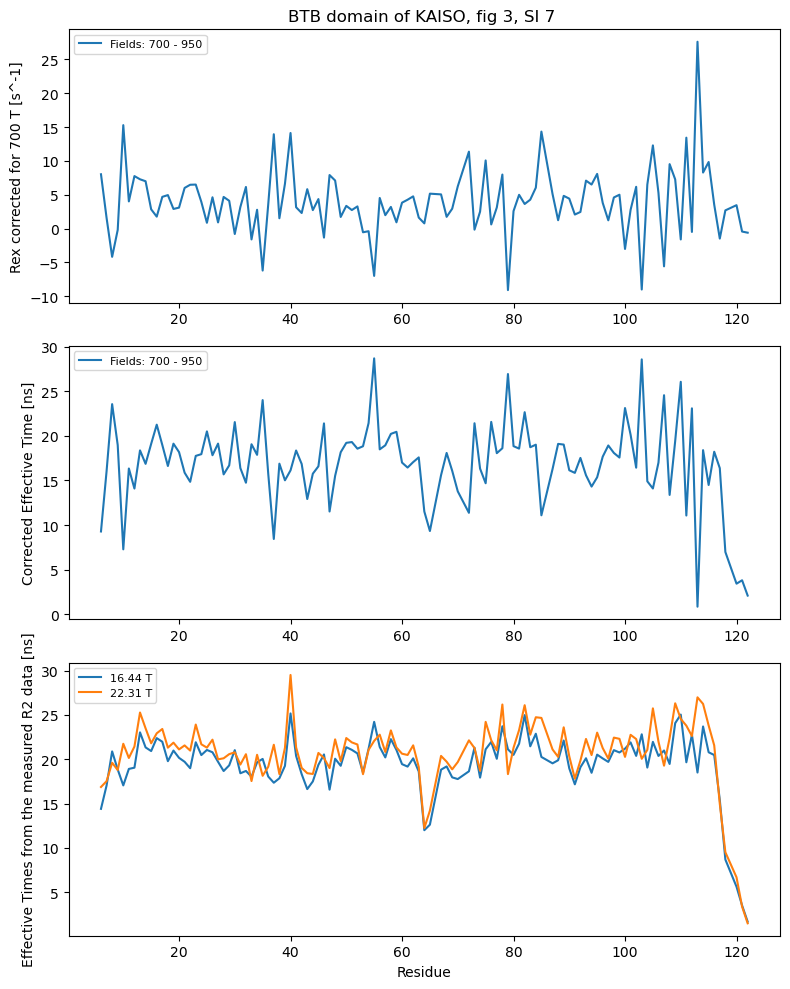

In [132]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,1,figsize=(8,10))
for mag1,data1 in KAISO.items():
    for mag2,data2 in KAISO.items():
        if mag2>mag1:
        
            B1=mag1*2*np.pi/gammaH*10**6
            B2=mag2*2*np.pi/gammaH*10**6
            
            wn1 = gammaN * B1 
            wn2 = gammaN * B2 

    
            K1=(d**2 / 20)
            K2_1=(wn1 * 160 * 10**(-6))**2 / 45
            K2_2=(wn2 * 160 * 10**(-6))**2 / 45

            A1=1/(4*K1+4*K2_1)
            A2=1/(4*K1+4*K2_2)
                            
            Rex=[]
            Rex2=[]
            residues=[]
            eff=[]
            for residue in data1:
                if residue[0] in np.array(data2)[:,0]:
                    
                    pos_big=list(np.array(data2)[:,0]).index(residue[0])
                    R2_1=residue[1]
                    R2_2=np.array(data2)[:,1][pos_big]
                    Rex.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2)/((float(mag1)/700)**2))
                    Rex2.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2))
                    residues.append(int(residue[0]))
                    eff.append((R2_1-Rex2[-1])*A1*10**9)
            axs[1].plot(residues,eff,"-",label=f'Fields: {mag1} - {mag2}')
            axs[0].plot(residues,Rex,"-",label=f'Fields: {mag1} - {mag2}')
                    
residues=[]
eff=[]
for B,data in effective_times.items():
    axs[2].plot(np.array(data)[:,0],np.array(data)[:,1],label=f'{B:.2f} T')                
 

axs[0].legend(prop={'size':8})
axs[1].legend(prop={'size':8})
axs[2].legend(prop={'size':8})

axs[0].set_ylabel('Rex corrected for 700 T [s^-1]')
axs[1].set_ylabel('Corrected Effective Time [ns]')
axs[2].set_ylabel('Effective Times from the measured R2 data [ns]')
axs[2].set_xlabel("Residue")

axs[0].set_title('BTB domain of KAISO, fig 3, SI 7 ')

plt.savefig('KAISO.png')

In [124]:
MIZI2={}
MIZI2[700]=[]
MIZI2[950]=[]

with open('MIZ1-BTB_HUWE1_700MHz.dat') as f:
    for line in f:
        if float(line.split()[0])<114:
            MIZI2[700].append([np.round(float(line.split()[0])),float(line.split()[1])])
        
with open('MIZ1-BTB_HUWE1_950MHz.dat') as f:
    for line in f:
        if float(line.split()[0])<114:
            MIZI2[950].append([np.round(float(line.split()[0])),float(line.split()[1])])
        


In [125]:
effective_times={}
for mag,data in MIZI2.items():
    B=mag*2*np.pi/gammaH*10**6
    wn = gammaN * B
    K1=(d**2 / 20)
    K2=(wn * 160 * 10**(-6))**2 / 45
    A=1/(4*K1+4*K2)
    effective_times[B]=[]
    for residue in data:                            
        effective_times[B].append([residue[0],(residue[1])*A*10**9])

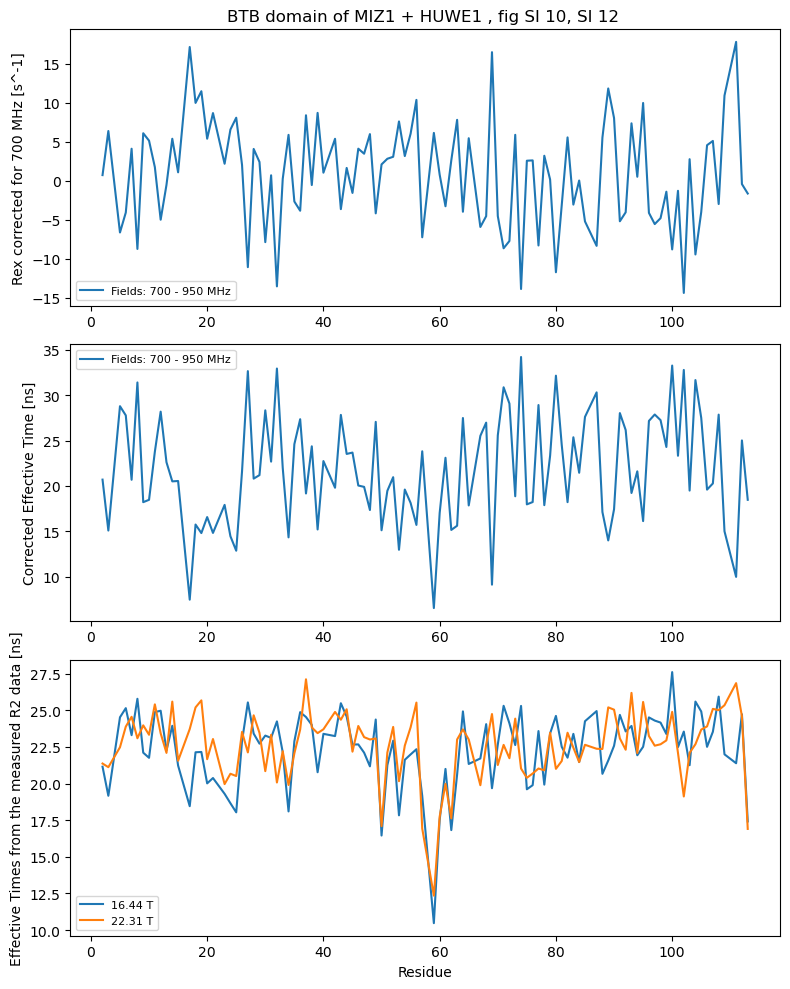

In [126]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,1,figsize=(8,10))
for mag1,data1 in MIZI2.items():
    for mag2,data2 in MIZI2.items():
        if mag2>mag1:
        
            B1=mag1*2*np.pi/gammaH*10**6
            B2=mag2*2*np.pi/gammaH*10**6
            wn1 = gammaN * B1 
            wn2 = gammaN * B2 

    
            K1=(d**2 / 20)
            K2_1=(wn1 * 160 * 10**(-6))**2 / 45
            K2_2=(wn2 * 160 * 10**(-6))**2 / 45

            A1=1/(4*K1+4*K2_1)
            A2=1/(4*K1+4*K2_2)
                            
            Rex=[]
            Rex2=[]
            residues=[]
            eff=[]
            for residue in data1:
                if residue[0] in np.array(data2)[:,0]:
                    
                    pos_big=list(np.array(data2)[:,0]).index(residue[0])
                    R2_1=residue[1]
                    R2_2=np.array(data2)[:,1][pos_big]
                    Rex.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2)/((float(mag1)/mag1)**2))
                    Rex2.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2))
                    residues.append(int(residue[0]))
                    eff.append((R2_1-Rex2[-1])*A1*10**9)
            axs[1].plot(residues,eff,"-",label=f'Fields: {mag1} - {mag2} MHz')
            axs[0].plot(residues,Rex,"-",label=f'Fields: {mag1} - {mag2} MHz')
                    
residues=[]
eff=[]
for B,data in effective_times.items():
    labell=f'{B:.2f} T'
    axs[2].plot(np.array(data)[:,0],np.array(data)[:,1],label=labell)                
 

axs[0].legend(prop={'size':8})
axs[1].legend(prop={'size':8})
axs[2].legend(prop={'size':8})

axs[0].set_ylabel('Rex corrected for 700 MHz [s^-1]')
axs[1].set_ylabel('Corrected Effective Time [ns]')
axs[2].set_ylabel('Effective Times from the measured R2 data [ns]')
axs[2].set_xlabel("Residue")

axs[0].set_title('BTB domain of MIZ1 + HUWE1 , fig SI 10, SI 12 ')

plt.savefig('MIZ1_HUWE1.png')


In [140]:
a_sarcin={}
a_sarcin[11.7]=[]
a_sarcin[17.6]=[]
rex=[]

with open('cytotoxic_Ribonuclease_a-sarcin_R2_11.7T.dat') as f:
    for line in f:
        a_sarcin[11.7].append([np.round(float(line.split(',')[0])),float(line.split(',')[1])])
        
with open('cytotoxic_Ribonuclease_a-sarcin_R2_17.6T.dat') as f:
    for line in f:
        a_sarcin[17.6].append([np.round(float(line.split(',')[0])),float(line.split(',')[1])])
        
with open('cytotoxic_Ribonuclease_a-sarcin_rex.dat') as f:
    for line in f:
        rex.append([np.round(float(line.split(',')[0])),float(line.split(',')[1])])

In [141]:
effective_times={}
for B,data in a_sarcin.items():
    wn = gammaN * B
    K1=(d**2 / 20)
    K2=(wn * 160 * 10**(-6))**2 / 45
    A=1/(4*K1+4*K2)
    effective_times[B]=[]
    for residue in data:                            
        effective_times[B].append([residue[0],(residue[1])*A*10**9])

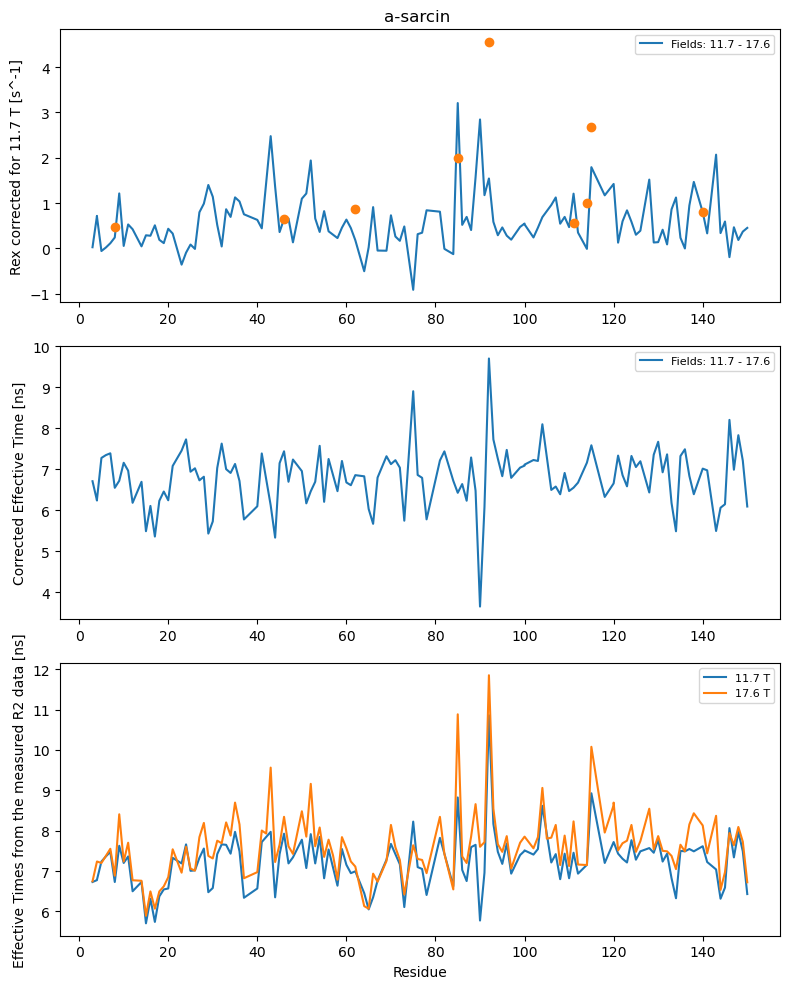

In [144]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,1,figsize=(8,10))
for B1,data1 in a_sarcin.items():
    for B2,data2 in a_sarcin.items():
        if B2>B1:
        
                
            wn1 = gammaN * B1 
            wn2 = gammaN * B2 

    
            K1=(d**2 / 20)
            K2_1=(wn1 * 160 * 10**(-6))**2 / 45
            K2_2=(wn2 * 160 * 10**(-6))**2 / 45

            A1=1/(4*K1+4*K2_1)
            A2=1/(4*K1+4*K2_2)
                            
            Rex=[]
            Rex2=[]
            residues=[]
            eff=[]
            for residue in data1:
                if residue[0] in np.array(data2)[:,0]:
                    
                    pos_big=list(np.array(data2)[:,0]).index(residue[0])
                    R2_1=residue[1]
                    R2_2=np.array(data2)[:,1][pos_big]
                    Rex.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2)/((float(B1)/11.7)**2))
                    Rex2.append((A1*R2_1-A2*R2_2)/(A1-A2*(B2/B1)**2))
                    residues.append(int(residue[0]))
                    eff.append((R2_1-Rex2[-1])*A1*10**9)
            axs[1].plot(residues,eff,"-",label=f'Fields: {B1} - {B2}')
            axs[0].plot(residues,Rex,"-",label=f'Fields: {B1} - {B2}')
                    
residues=[]
eff=[]
for B,data in effective_times.items():
    axs[2].plot(np.array(data)[:,0],np.array(data)[:,1],label=str(B)+" T")                

axs[0].plot(np.array(rex)[:,0],np.array(rex)[:,1],'o')

axs[0].legend(prop={'size':8})
axs[1].legend(prop={'size':8})
axs[2].legend(prop={'size':8})

axs[0].set_ylabel('Rex corrected for 11.7 T [s^-1]')
axs[1].set_ylabel('Corrected Effective Time [ns]')
axs[2].set_ylabel('Effective Times from the measured R2 data [ns]')
axs[2].set_xlabel("Residue")

axs[0].set_title('a-sarcin ')
plt.savefig('a-sarcin.png')